<a href="https://colab.research.google.com/github/gekaluck/bdml/blob/main/Lecture3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Machine Learning**
1. Overview of ML
2. Introduction to Classification
3. Popular Classification Base Learners
4. Examine **Scikit Learn** 
5. Some Preliminaries
6. Explore Classifier Algorithms On The Iris Data Set
7. Bias-Variance Tradeoff
8. Construct the **XOR** dataset
9. Employ ML Algorithms On **XOR** Data Set
10. California Housing -- Fun in the Sun!
11. Popular Regression Algorithms
12. Performance Measures for Classification
13. Performance Measures for Regression
14. Homework Assignment 3


# **1. Overview & History of Machine Learning (ML)**

Content: [What is Big Data?] https://opensistemas.com/wp-content/uploads/2020/06/4-Vs-of-big-data-1.jpg

Source: https://opensistemas.com/en/the-four-vs-of-big-data/ Fair use claimed.



Content & Source: [What is ML?] https://docs.paperspace.com/machine-learning/wiki/supervised-unsupervised-and-reinforcement-learning Fair use claimed



Content: [History of ML] http://beamlab.org/images/deep_learning_101/nn_timeline.jpg 

Source: http://beamlab.org/deeplearning/2017/02/23/deep_learning_101_part1.html
Fair use claimed.

# **2. Introduction to Classification (Supervised Learning)**
Content: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/









# **3. Popular Classification Base Learners**

  1. [Logistic Regression](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)
  2. [k Nearest Neighbors](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
  3. [Classification Tree](https://medium.com/data-science-group-iitr/decision-trees-decoded-c70b4f7ff542)
  4. [Support Vector Machine](https://medium.com/data-science-group-iitr/support-vector-machines-svm-unraveled-e0e7e3ccd49b)
  5. [Naive Bayes](https://medium.com/data-science-group-iitr/naive-bayes-unfolded-b2ab036b42b1)

Source: https://machinelearningmastery.com/types-of-classification-in-machine-learning/

# **4. Examine Scikit Learn**

SciKit-learn is a library packed full of simple and efficient methods for data analytics, predictive analysis, machine learning, and much more. Over time, it has been built up to be an amazing place to start learning about machine learning with equations, citations, and code readily available. When browsing note that the default setting are typically very good, so in order to get a sense of the models and to build your intiution, just run them as is initially. Once you get some sense of their behaviors feel free to fine-tune the hyper-parameters. Those are the parameters that are not learned by the algorithms.  

[Site](https://scikit-learn.org/dev/index.html)


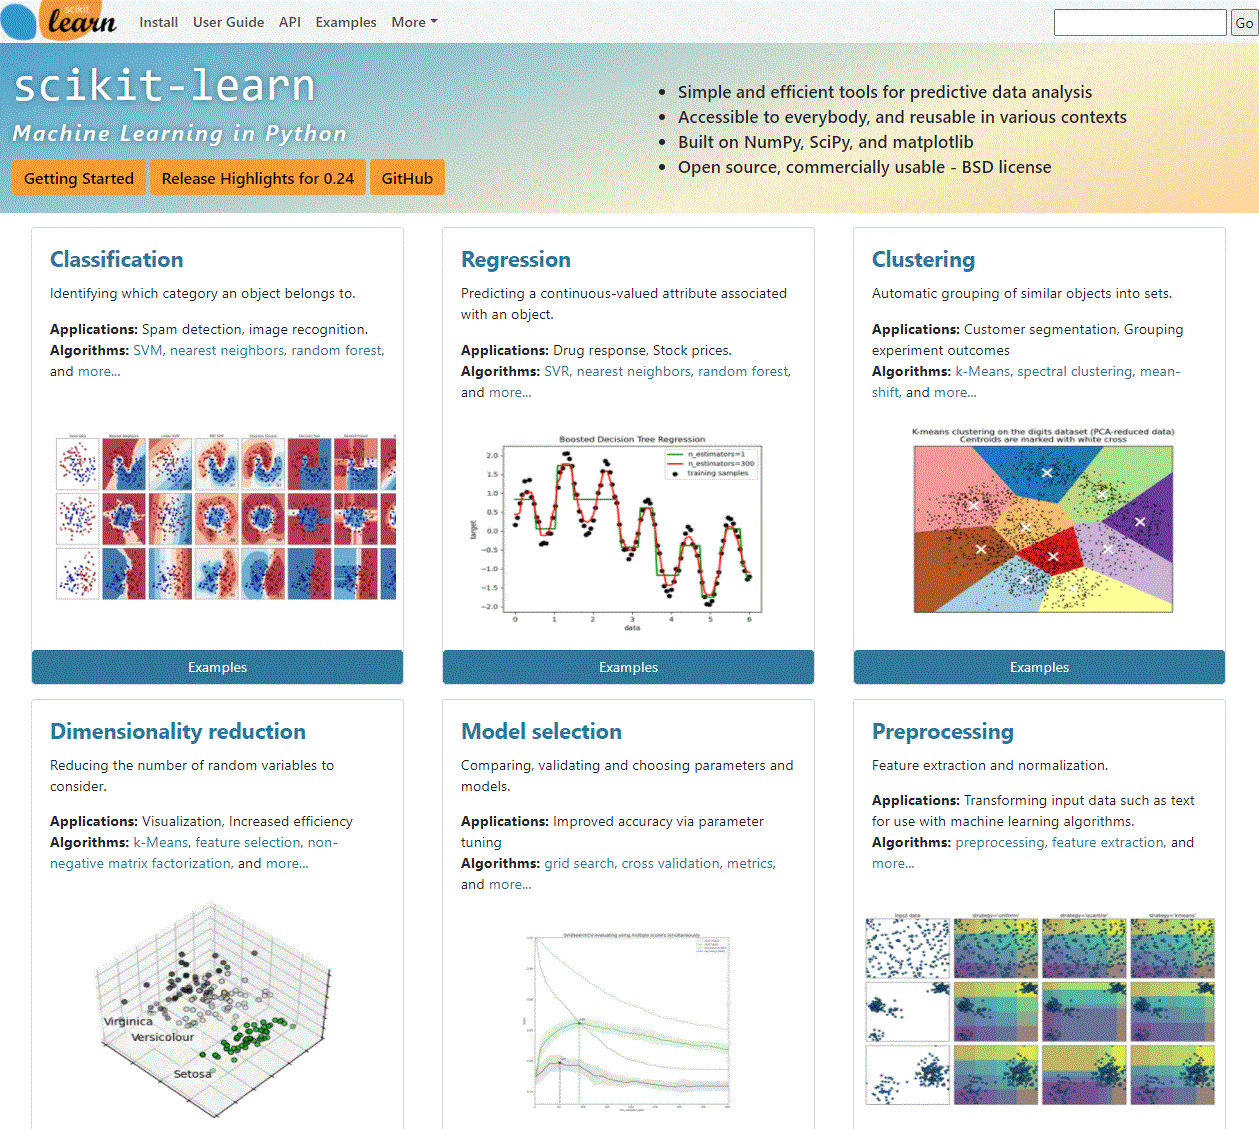

# **5. Some Preliminaries**
Load libraries and execute some code to plot decision regions

In [20]:
# Add in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# The code below comes from p. 32 of the class text by Raschka & Mirjlili
# It plots the decision regions of a classifier

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()), plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
def decision_region(classifier_, X, y, title, x_ax, y_ax):
  plot_decision_regions(X, y, classifier=classifier_)
  plt.title(title)
  plt.xlabel(x_ax)
  plt.ylabel(y_ax)
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

def confusion(classifier, X_test, y_test, x_ax, y_ax):
  np.set_printoptions(precision=2)
  # Plot non-normalized confusion matrix
  titles_options = [("Confusion matrix, without normalization for TEST data", None),
                  ("Normalized confusion matrix", 'true')]
  for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[x_ax, y_ax],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
  plt.show()

#**6. Explore Classifier Algorithms on Iris Data Set**

[Slides: base learners for classification](https://docs.google.com/presentation/d/1im5lhwd5YFMsIBAJjGcjd5VXrvsKwEGJf8XNFGc4pe0/edit?usp=sharing)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Head of Iris Dataframe

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


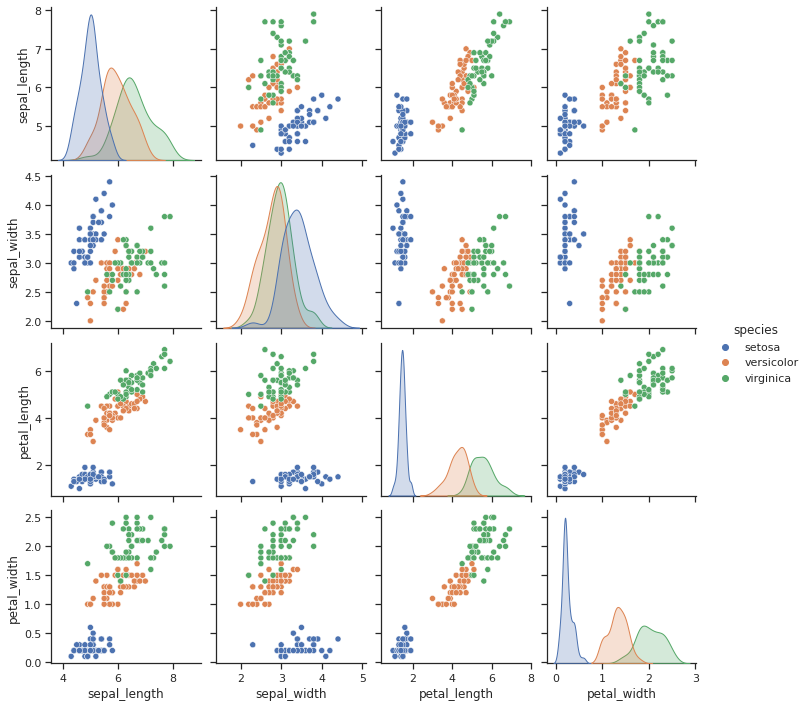

In [22]:
#First mount your Google drive and read in the iris.csv data

from google.colab import drive
drive.mount('/content/drive')

file_ = "drive/My Drive/Colab Notebooks/Big Data ML/iris.csv"
df = pd.read_csv(file_) # read in csv file
print("Head of Iris Dataframe\n")
print(df.head())
print(df.tail())
X = df.iloc[:, [0,1,2,3]].values  # sepal L, sepal W, petal L, petal W
y = df.iloc[:, 4].values  # type of iris (first 50 instaces are "setosa", next 50 are "versicolor," last 50 are "virginica")

sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

# select setosa and versicolor
y = df.iloc[50:150, 4].values  # selects the 100 instances to use (e.g., setosa and versicolor)
y = np.where(y == 'virginica', -1, 1) #converts "setosa" to -1 and the other two labels to 1 (want numerical labels, n)


# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values



#*Perceptron*
We will cover the mathematics later in this course for the Perceptron. Let's first understand how to use the Perceptron algorithm. It's the building block for the Neural Network. 


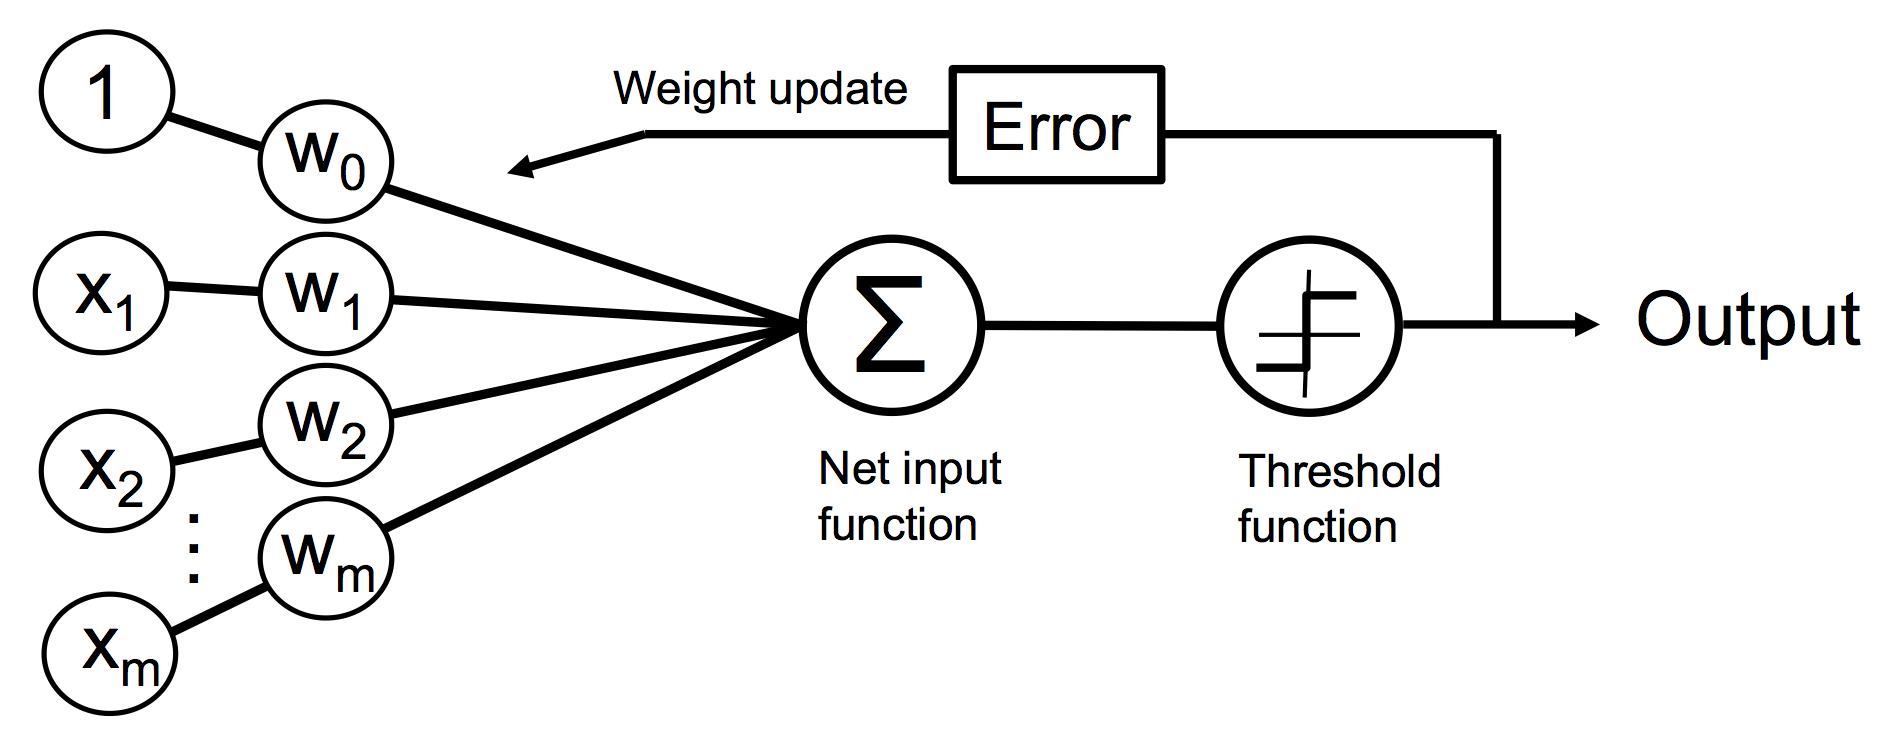

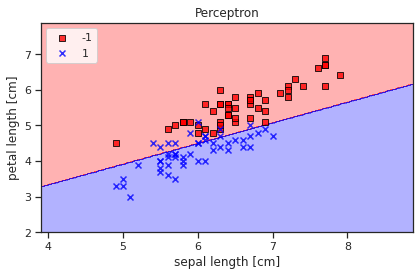

In [23]:
# Will try the Perceptron first

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(eta=0.3,n_iter=1000)
ppn.fit(X,y)
decision_region(ppn,X,y,'Perceptron','sepal length [cm]','petal length [cm]')

#*Logistic Regression*
Basic Idea: https://www.analyticsvidhya.com/wp-content/uploads/2015/11/plot.png Source: https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/

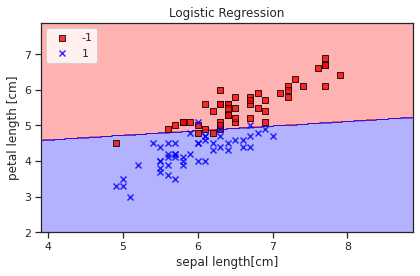

Confusion matrix, without normalization for TEST data
[[12  0]
 [ 3 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.23 0.77]]


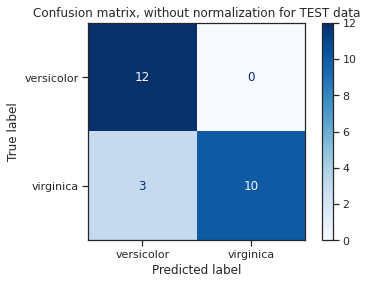

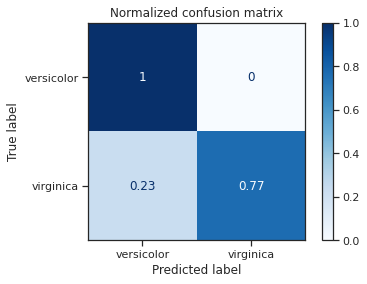

In [5]:

#Train a LogisticRegression model from https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto').fit(X, y)
decision_region(lr,X, y, 'Logistic Regression','sepal length[cm]','petal length [cm]')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run logistic classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto').fit(X_train, y_train)

confusion(classifier, X_test, y_test, 'versicolor','virginica')

#*k Nearest Neighbors Classifier*
Basic Idea: https://editor.analyticsvidhya.com/uploads/17303KNN%20working.png
Source: https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/

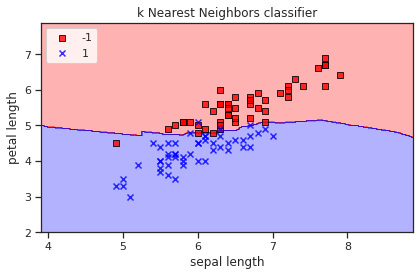

Confusion matrix, without normalization for TEST data
[[12  0]
 [ 2 11]]
Normalized confusion matrix
[[1.   0.  ]
 [0.15 0.85]]


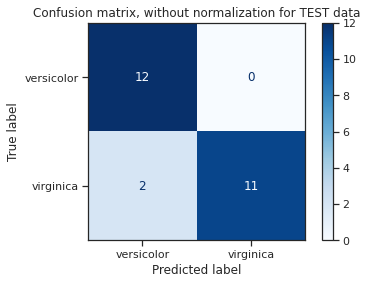

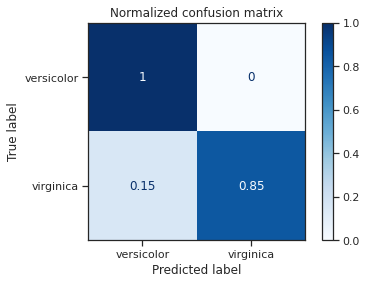

In [6]:
#Train a k Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3).fit(X, y)
decision_region(classifier,X, y, 'k Nearest Neighbors classifier','sepal length','petal length')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run kNN classifier
classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

confusion(classifier, X_test, y_test, 'versicolor','virginica')

# *Decision Tree (a.k.a. Classification Tree)*
Basic Idea: https://www.jeremyjordan.me/content/images/2017/03/Screen-Shot-2017-03-11-at-10.15.37-PM.png
Source: https://www.jeremyjordan.me/decision-trees/

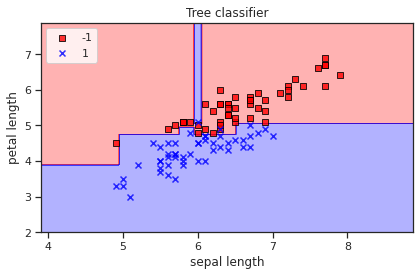

Confusion matrix, without normalization for TEST data
[[12  0]
 [ 3 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.23 0.77]]


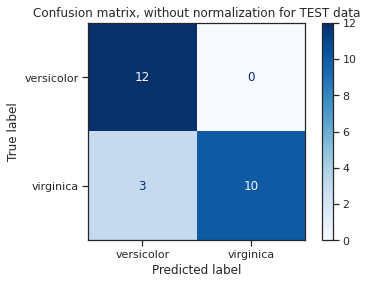

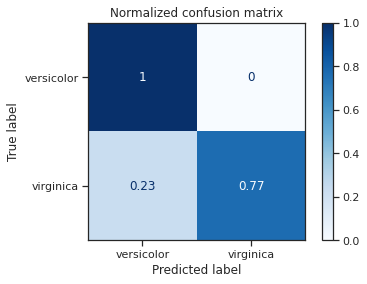

In [7]:
#Train a Classification Tree model
from sklearn import tree
classifier = tree.DecisionTreeClassifier().fit(X, y)
decision_region(classifier,X, y, 'Tree classifier','sepal length','petal length')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run tree classifier
classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)

confusion(classifier, X_test, y_test, 'versicolor','virginica')

#*Support Vector Machine*
Basic Idea: [link](https://thumbs.gfycat.com/CluelessDefinitiveBlackandtancoonhound-max-1mb.gif)

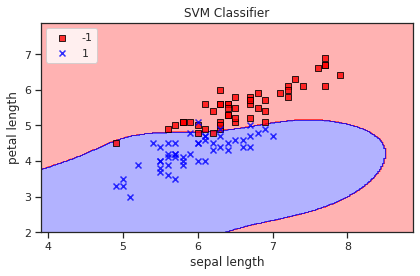

Confusion matrix, without normalization for TEST data
[[12  0]
 [ 2 11]]
Normalized confusion matrix
[[1.   0.  ]
 [0.15 0.85]]


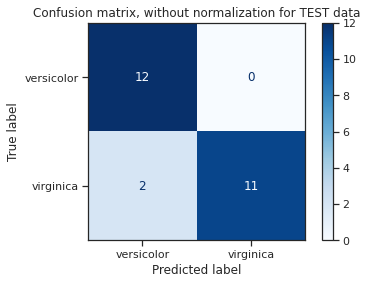

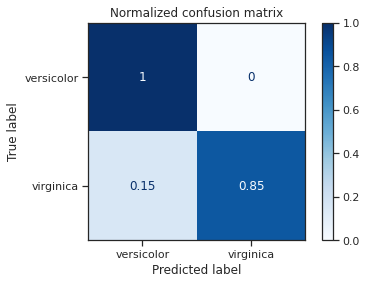

In [8]:
#Train a Support Vector Machine (SVM) model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf')).fit(X, y)
decision_region(classifier,X, y, 'SVM Classifier','sepal length','petal length')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run SVM classifier
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf')).fit(X_train, y_train)

confusion(classifier, X_test, y_test, 'versicolor','virginica')

#*Naive Bayes Classifier*
Basic Idea: use Bayes' theorem with independence assumptions

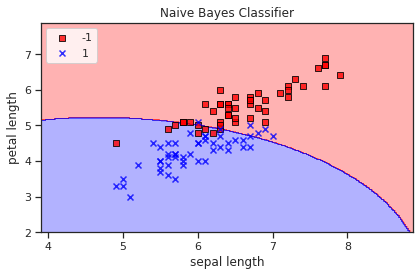

Confusion matrix, without normalization for TEST data
[[11  1]
 [ 4  9]]
Normalized confusion matrix
[[0.92 0.08]
 [0.31 0.69]]


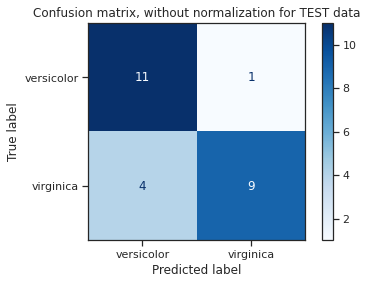

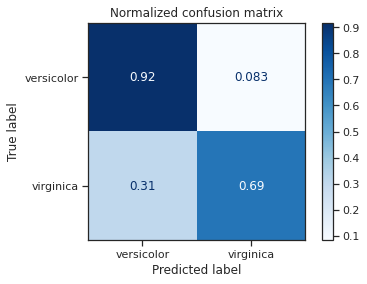

In [9]:
#Train a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X, y)
decision_region(classifier,X, y, 'Naive Bayes Classifier','sepal length','petal length')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run NB classifier
classifier = GaussianNB().fit(X_train, y_train)

confusion(classifier, X_test, y_test, 'versicolor','virginica')




#**7. Bias-Variance Tradeoff**
Source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fin.pinterest.com%2Fpin%2F337558934571426155%2F&psig=AOvVaw2eQBETgMcAy-wo48kEbdKd&ust=1631048792798000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKCWvLmg6_ICFQAAAAAdAAAAABAK Fair Use claimed.

## **8. Construct the XOR Data Set**

Using the following code below, we will create a simple data set that has the form of an XOR gate using the logical_xor() function from NumPy, where 50 examples will be assigned the class label 1, and 50 examples will be assigned the class label -1. In your homework assignment you will be asked to change this to 500 examples of each.  

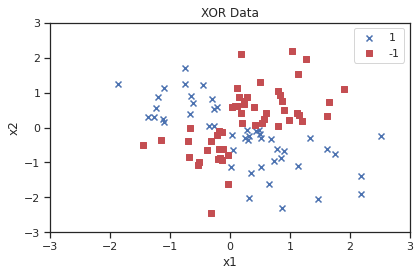

In [10]:
# Step 1 create the XOR data set

np.random.seed(1)               # Set the seed to "1", for consistency 

###############################
X_xor = np.random.randn(100, 2) # Need to change here for assignment 
###############################

y_xor = np.logical_xor(X_xor[:, 0] > 0,   # https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor ==  1, 0], X_xor[y_xor ==  1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title('XOR Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

# **9. Employ several ML algos on XOR data**
In this section we will instantiate an object from a given class of machine learning algorithms, then fit this object to the XOR data. We will then look at how well these algorithms separate the data. Notice that there are some that separate with lines, boxes, and curves. 

In this two dimensional space we will build our intuition, we will need to rely on this intuition when we go into a higher dimensional feacture space. For the XOR data set we are in a 2-dimensional feature space. Think about what lines, boxes, and curves would look like in a 3-dimensional feature space. Now, how about 784-dimensional feature space! 


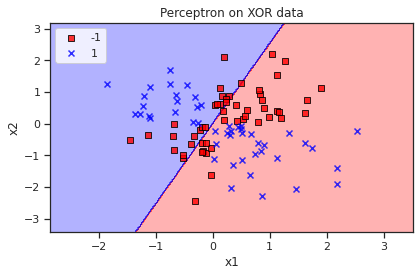

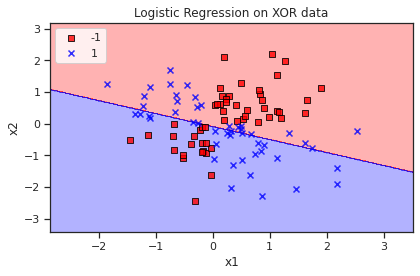

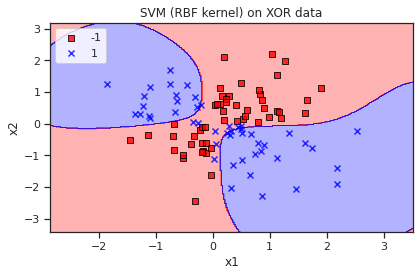

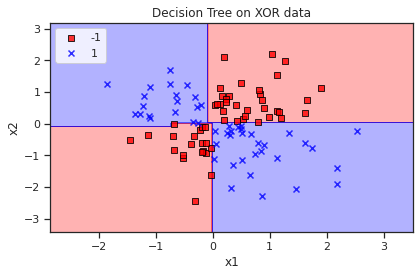

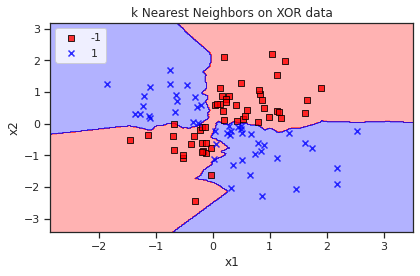

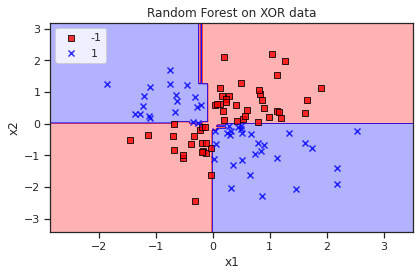

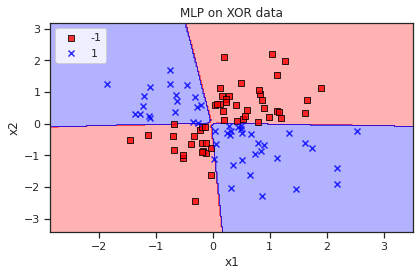

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "k Nearest Neighbors", "Random Forest", "MLP"]

classifiers = [
    Perceptron(random_state=1),    
    LogisticRegression(),   
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000)]

# The code below comes from p. 32 of the class text by Raschka & Mirjlili
# It plots the decision regions of a classifier

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()), plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
def decision_region(classifier_, X, y, title, x_ax, y_ax):
  plot_decision_regions(X, y, classifier=classifier_)
  plt.title(title)
  plt.xlabel(x_ax)
  plt.ylabel(y_ax)
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

# iterate over classifiers
for name, clf in zip(names, classifiers):
  clf.fit(X_xor, y_xor)
  decision_region(clf, X_xor, y_xor, name + ' on XOR data','x1','x2')


# **10. California Housing -- Fun in the Sun!** 

We will now do a supervised regression task, employing the California Housing dataset. First we will read in the data. Next we will set our dependent variable (y) and our independent variables (X). Note that X is our features, what is the feature space dimension? After fitting our linear regression model we will make predictions with the model and check how well we did. Our performance measure that we will use here is Mean-Squared-Error (MSE). 

In [12]:
# Please use this code  

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')

print('The shape of this data is:', df.shape, '\n')

################
df = df[-100::] # This is the last 100 rows of this data, you will need to adjust this for homework question 2.b. 
################

df.reset_index(inplace=True, drop=True) # reset the index

print('Now, the shape of this data is:', df.shape, '\n')
df.describe().T

The shape of this data is: (17000, 9) 

Now, the shape of this data is: (100, 9) 



,count,mean,std,min,25%,50%,75%,max
longitude,100.0,-124.146200,0.056672,-124.3500,-124.170000,-124.15000,-124.100000,-124.0500
latitude,100.0,40.879200,0.362546,40.0600,40.745000,40.79000,40.885000,41.9500
housing_median_age,100.0,31.870000,11.930485,11.0000,22.000000,32.00000,39.000000,52.0000
total_rooms,100.0,2029.710000,892.019005,334.0000,1415.250000,1978.50000,2559.500000,5694.0000
total_bedrooms,100.0,421.800000,175.023231,74.0000,318.250000,401.00000,528.750000,1056.0000
population,100.0,1025.590000,503.159534,235.0000,763.250000,950.50000,1267.750000,3546.0000
households,100.0,392.190000,158.844991,83.0000,289.250000,379.50000,483.000000,972.0000
median_income,100.0,2.453593,0.732832,0.7684,1.972775,2.44695,2.925725,4.8516
median_house_value,100.0,88044.000000,21792.410504,50800.0000,73500.000000,82050.00000,97950.000000,153100.0000


In [13]:
# Let's examine the data's head and tail
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-124.05,40.85,31.0,2414.0,428.0,1005.0,401.0,3.5156,143000.0
1,-124.05,40.59,32.0,1878.0,340.0,937.0,353.0,3.4408,95200.0
2,-124.06,41.13,22.0,3263.0,799.0,1384.0,578.0,2.4708,119400.0
3,-124.06,40.88,12.0,2087.0,424.0,1603.0,438.0,2.5667,139500.0
4,-124.06,40.86,34.0,4183.0,702.0,1891.0,669.0,3.2216,98100.0


In [14]:
###############################
y = df['median_house_value' ]
X = df[['population','households', 'median_income']] # Need to adjust here for 2.c. 
###############################

regr = linear_model.LinearRegression()

regr.fit(X, y)

# Make predictions 
y_pred = regr.predict(X)

# The coeff
print('Coefficients: \n', regr.coef_)
# The MSE
print('Mean Squared Error: %.2f ' % mean_squared_error(y, y_pred))  # 2.d.
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))


Coefficients: 
 [ 4.27e+00 -1.88e+01  8.52e+03]
Mean Squared Error: 426684442.34 
Coefficient of determination: 0.09


In [15]:
# Helper code for 2.e 
y = np.where(df['median_income'] > np.median(df['median_income']), 1, 0)


# **11. Popular Regression Base Learners**

  1. Linear Regression
  2. Ridge Regression
  3. Neural Network Regression
  4. Lasso Regression
  5. Regression Tree
  6. Random Forest
  7. kNN Regression
  8. SVM Regression

Source: https://www.jigsawacademy.com/popular-regression-algorithms-ml/

Main Ideas:
*   Experimental posture (e.g., try dfferent algorithms, hyperparameters, etc.)
*   Train on a portion of the data, test on *other* data
*   Need metrics that tie algorithm performance to the business problem. Metrics differ for classification and regression. 
*   Base learners are OK, but ensembles (collections of base learners) will win "every time"




---



# **12. Performance Metrics for Classification**

Aggregate-level measures: Confusion matrix and derivative measures: https://en.wikipedia.org/wiki/Confusion_matrix

Instance-level measures: propensities

#**13. Performance Metrics for Regression**

Aggregate-level measures: MSE, RMSE, MAE, MAPE, ME. See https://machinelearningmastery.com/regression-metrics-for-machine-learning/

Instance-level measjures: percentage error or absolute percentage error.

#**14. Homework Assignment 3**
1. a) Create the XOR dataset and plot with **500** instances.

   b) Instantiate a **Perception** model, fit the XOR dataset you just created and plot the decision region. Do this for **Logistic Regression**, **SVC**, **Decision Tree**, and **K-Nearest Neighbors**. 

   c) Now find and instantiate a **Random Forest** model, fit the XOR dataset and plot the decision region ([Hint](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).

   e) One more, find and instantiate a **MLPClassifier** model, fit the XOR dataset and plot the decision region. Use: hidden_layer_sizes=(50,50 ), ([Hint](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). In your own words, what do you think these "hidden layers" do? 

  
2. California Housing -- Fun in the Sun!  

   a) Read the California Housing dataset from: https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv

   b) Use the top 10,000 rows as our data (if time permits use the entire dataset)

   c) Use **'median_house_value'** column as your dependent variable (y). 
   Features (X) = **['housing_median_age','total_rooms','total_bedrooms','population','households', 'median_income']**

   d) Create a supervised regression model. (Hint: **See code below**) Output the Mean-Square-Error. Pick another regression model from [here](https://scikit-learn.org/stable/modules/linear_model.html#) and redo d). 

   e) Use the median of **'median_income'**, create a dummy variable of 1 with greater than the median and 0 for less than the median. Create a supervised classification model, find the best algorithms. (Hint: Try several from [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)) Output the accuracy for each. 

   f) In your own words what are the metrics reported in d) and e)? How are they similar and different? 

3. How can you tell if these models that you fit in Assignment 3. would be useful to make robust out-of-sample predictions? That is, suppose we were given new data, how accurate would these models be, can you tell from the work that you've done thus far? What is missing here or do you think you have a good enough prediction model to make live predictions? Again use your own words. Answer in less than 100 words, write to an Executive so no useless jargon. 

4. For your **Final Project** start to think about which topic and dataset you may employ. What is your topic area? (e.g. healthcare, finance, etc.) Where will you find this data (e.g. [Kaggle](https://www.kaggle.com/datasets), [UCI](https://archive.ics.uci.edu/ml/datasets.php), [AWS Open Data](https://registry.opendata.aws/), [US Gov't open data](https://www.data.gov/), [Google Cloud Econ data](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&filter=category:economics), etc.)? Begin to look for your topic and dataset. Write down what you think would be good topic and what characteristics of a dataset would make it useful for this topic. You will narrow down both by end of week 6, so you have time. For this question please write down your answer in less than 100 words in an Executive summary format. Note that you can change both topic and dataset before week 6. This is just to get you thinking in the right direction. **PLEASE SUBMIT THIS AS A GROUP IN THE WOW APRESENTATION ASSIGNMENT FOR THE WEEK**




a) Create the XOR dataset and plot with 500 instances.

b) Instantiate a Perception model, fit the XOR dataset you just created and plot the decision region. Do this for Logistic Regression, SVC, Decision Tree, and K-Nearest Neighbors.



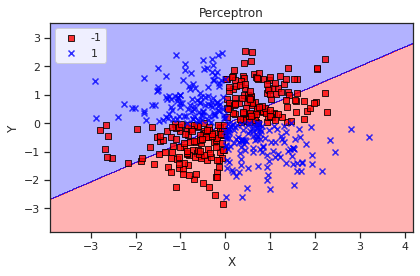

In [24]:
import numpy as np


np.random.seed(9)               
X_xor = np.random.randn(500, 2) 
y_xor = np.logical_xor(X_xor[:, 0] > 0,  
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

ppn = Perceptron(eta=0.3,n_iter=1000)
ppn.fit(X_xor,y_xor)
decision_region(ppn,X_xor,y_xor,'Perceptron','X','Y')

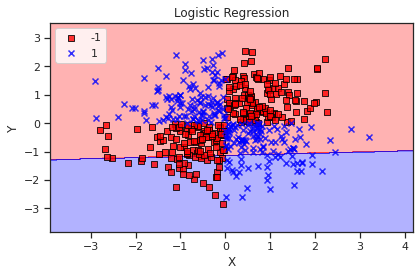

In [25]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto').fit(X_xor, y_xor)
decision_region(lr,X_xor,y_xor,'Logistic Regression','X','Y')

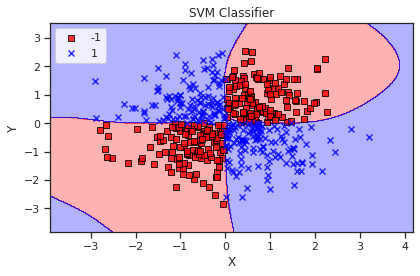

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf')).fit(X_xor, y_xor)
decision_region(classifier,X_xor, y_xor, 'SVM Classifier','X','Y')

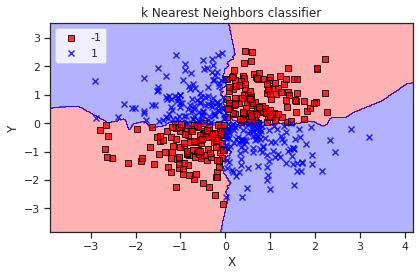

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3).fit(X_xor, y_xor)
decision_region(classifier,X_xor, y_xor, 'k Nearest Neighbors classifier','X','Y')


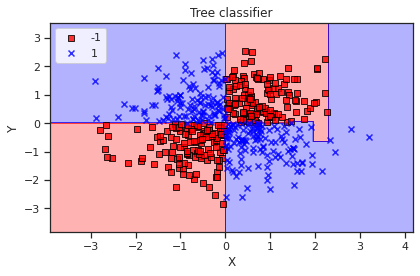

In [28]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier().fit(X_xor, y_xor)
decision_region(classifier,X_xor, y_xor, 'Tree classifier','X','Y')

*c) Now find and instantiate a Random Forest model, fit the XOR dataset and plot the decision region*

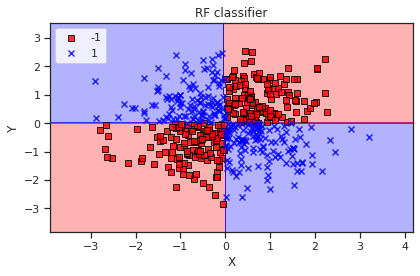

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_xor, y_xor)
decision_region(classifier,X_xor, y_xor, 'RF classifier','X','Y')

*e) One more, find and instantiate a MLPClassifier model, fit the XOR dataset and plot the decision region.*

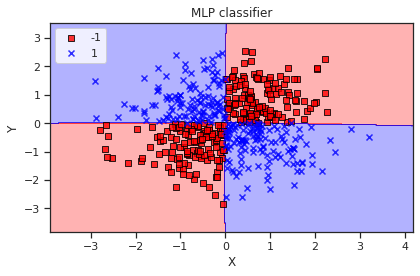

In [30]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000).fit(X_xor, y_xor)
decision_region(classifier,X_xor, y_xor, 'MLP classifier','X','Y')

*In your own words, what do you think these "hidden layers" do?*

Hidden layers are layers of the neural network between the one that processes inputs and the one that produces outputs. The hidden layers are complexifying the input data in order to find additional relationships between the input features. Adding more and more layers in the model would lead to overfit at some point

2. California Housing -- Fun in the Sun!  

   a) Read the California Housing dataset from: https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv

   b) Use the top 10,000 rows as our data (if time permits use the entire dataset)


In [31]:
#from google.colab import drive
#drive.mount('/content/drive')
file_ = "/content/drive/My Drive/Colab Notebooks/Big Data ML/california_housing_train.csv"
df = pd.read_csv(file_) 
df = df[:10000]


c) Use **'median_house_value'** column as your dependent variable (y). 
   Features (X) = **['housing_median_age','total_rooms','total_bedrooms','population','households', 'median_income']**

   d) Create a supervised regression model. (Hint: **See code below**) Output the Mean-Square-Error. Pick another regression model from [here](https://scikit-learn.org/stable/modules/linear_model.html#) and redo d). 


**Linear Regression**

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = df['median_house_value' ]
X = df[['housing_median_age','total_rooms','total_bedrooms','population',
        'households', 'median_income']]

regr = linear_model.LinearRegression().fit(X, y)
y_pred = regr.predict(X)

# The coeff
print('Coefficients: \n', regr.coef_)
# The MSE
print('Mean Squared Error: %.2f ' % mean_squared_error(y, y_pred))  # 2.d.
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [ 1.79e+03 -1.77e+01  7.32e+01 -3.85e+01  1.49e+02  4.59e+04]
Mean Squared Error: 5897933286.86 
Coefficient of determination: 0.55


**SGD Regression**

In [36]:
from sklearn.linear_model import SGDRegressor

regr = linear_model.SGDRegressor().fit(X, y)
y_pred = regr.predict(X)


# The MSE
print('Mean Squared Error: %.2f ' % mean_squared_error(y, y_pred))  # 2.d.
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

Mean Squared Error: 64713686549493568779257540247552.00 
Coefficient of determination: -4938423593661650436096.00


***To be honest, I do not really understand, why the values of metrics for SGD Regression model performance are so out of space. Therefore, I have included a BayesianRidge Regressor as well***

**BayesianRidge Regressor**

In [37]:
from sklearn.linear_model import BayesianRidge

regr = linear_model.BayesianRidge().fit(X, y)
y_pred = regr.predict(X)


# The MSE
print('Mean Squared Error: %.2f ' % mean_squared_error(y, y_pred))  # 2.d.
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

Mean Squared Error: 5897935830.40 
Coefficient of determination: 0.55


*e)  Use the median of 'median_income', create a dummy variable of 1 with greater than the median and 0 for less than the median. Create a supervised classification model, find the best algorithms. Output the accuracy for each.*



**Logit Regression**

Confusion matrix, without normalization for TEST data
[[993 256]
 [255 996]]
Normalized confusion matrix
[[0.8 0.2]
 [0.2 0.8]]


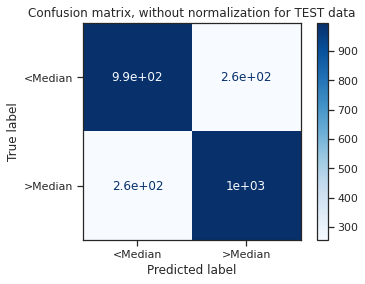

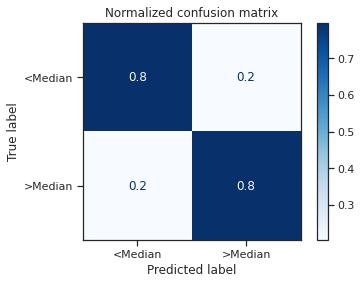

In [40]:
median = df['median_income'].median()
df['income_more_than_median'] = np.where(df['median_income'] > median, 1, 0)

y = df['income_more_than_median'].values
X = df[['housing_median_age','total_rooms','total_bedrooms','population',
        'households']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



# Run logistic classifier
classifier = LogisticRegression(random_state = 0, solver='saga', multi_class='auto', max_iter = 10000).fit(X_train, y_train)
confusion(classifier, X_test, y_test, '<Median','>Median')


**Decision Tree**

Confusion matrix, without normalization for TEST data
[[896 353]
 [324 927]]
Normalized confusion matrix
[[0.72 0.28]
 [0.26 0.74]]


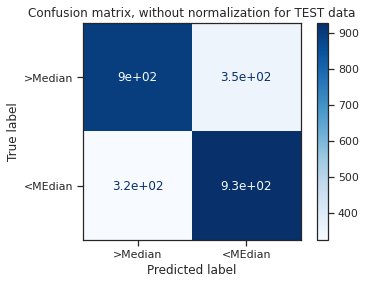

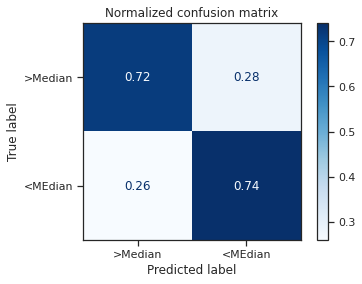

In [42]:
classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)

confusion(classifier, X_test, y_test, '>Median','<MEdian')


**Random Forest**

Confusion matrix, without normalization for TEST data
[[918 331]
 [409 842]]
Normalized confusion matrix
[[0.73 0.27]
 [0.33 0.67]]


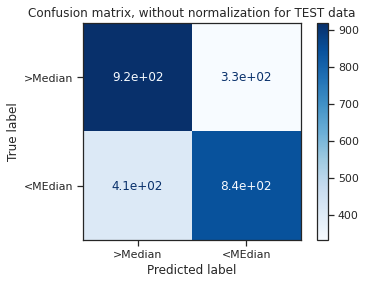

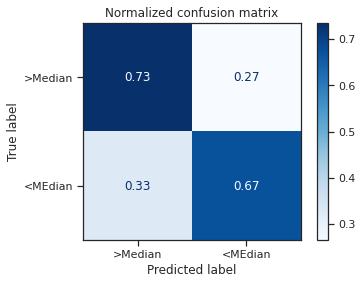

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
confusion(classifier, X_test, y_test, '>Median','<MEdian')

**SVM**

Confusion matrix, without normalization for TEST data
[[ 996  253]
 [ 248 1003]]
Normalized confusion matrix
[[0.8 0.2]
 [0.2 0.8]]


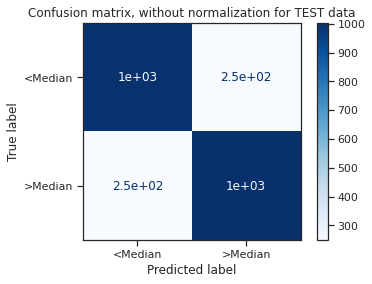

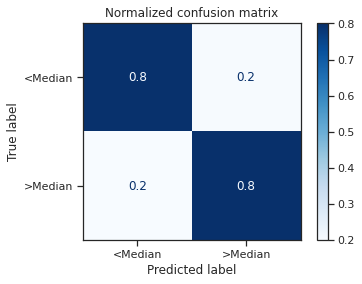

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

classifier = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf')).fit(X_train, y_train)
confusion(classifier, X_test, y_test, '<Median','>Median')

*f) In your own words what are the metrics reported in d) and e)? How are they similar and different?*

They are similar in their purpose -  measuring the accuracy of the model. 
However, they work differently.

With accuracy we really want to get close to the value of 1 in classification models, which means we classified all the instances correctly (in case of accuracy being 1, which is improbable in the model that is not overfitted).

While MSE in regression problems is the average of squares of distances between the actual value and estimated value. If we want to improve our model performance our goal is to minimize MSE .

*How can you tell if these models that you fit in Assignment 3. would be useful to make robust out-of-sample predictions? That is, suppose we were given new data, how accurate would these models be, can you tell from the work that you've done thus far? What is missing here or do you think you have a good enough prediction model to make live predictions? Again use your own words. Answer in less than 100 words, write to an Executive so no useless jargon.*

The context of data is extremely important. 
For instance, if we receive new data similar to California housing dataset, but the data is  from other country - like Russia or India, the model would most probably not perform well. Even if data performs ok on test dataset it does not mean that model is valid and ready for production. The reason is context - underlying assumptions about the environment from which data is collected. I assume that Indian real estate market differs drastically from Californian, with many different aspects (peculiarities) not reflected within the dataset with limited # of features.

